In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
import seaborn as sb
import numpy as np
from plotter import *
import pandas as pd
import glob
import os
from pygenesys.utils.growth_model import *

In [2]:
files = glob.glob('data/results/objective_value_**_V2.csv')
files.sort()
files

['data/results/objective_value_LC_V2.csv',
 'data/results/objective_value_XN_V2.csv',
 'data/results/objective_value_ZAN_V2.csv',
 'data/results/objective_value_ZN_V2.csv']

In [3]:
obj_dict = {}
for fname in files:
    scenario = fname.strip('.csv').split('_')[-2]
    obj_df = pd.read_csv(fname)
    data = np.array(obj_df['Objective_Value'])
    obj_dict[scenario] = data
#     print(obj_df)
# print(obj_dict)
df = pd.DataFrame(obj_dict)
df

,LC,XN,ZAN,ZN
0,131746.403869,156221.644879,156221.644880,182390.601444
1,131503.695325,152978.632488,152978.632485,177991.471277
2,131311.153961,157709.649171,157709.649167,184183.020722
3,131375.315240,154773.396960,154773.396983,180761.609373
4,131828.548275,159020.901028,159020.901025,186010.866883
...,...,...,...,...
117,132069.261558,161912.096378,162098.078715,190799.469411
118,132668.701118,161385.122481,161387.731508,189451.761693
119,132237.766942,156198.017837,156198.017837,182607.510786
120,132482.041840,160746.359625,160746.359626,188577.473910


In [4]:
# get the total demand
annual_demand = linear_growth(1.87e5, 2025, 2050, 6, 0.01) # GWh
tot_gwh = annual_demand.sum()

In [5]:
annual_demand

array([187000., 196350., 205700., 215050., 224400., 233750.])

In [6]:
bau_cost = 90100.9761217599/tot_gwh*1000

Text(0.5, 1.0, 'Variability of Electricity Cost')

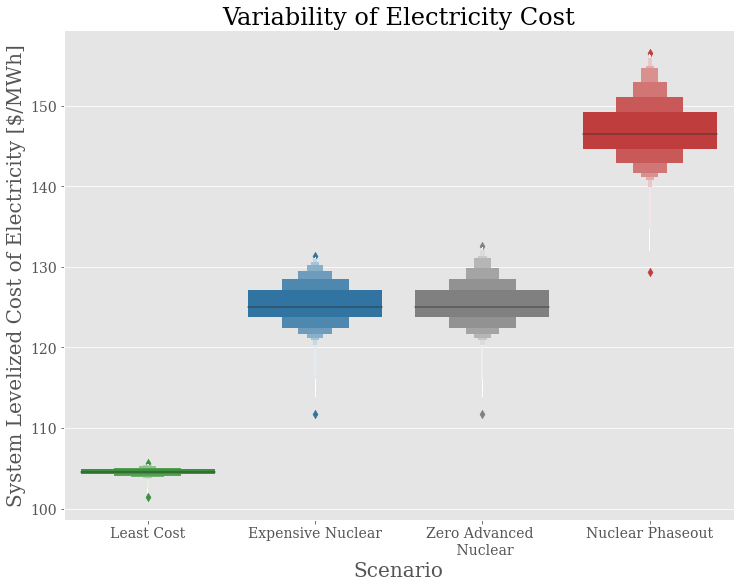

In [7]:
ax = sb.boxenplot(data = df/tot_gwh*1000, palette={'LC':'tab:green',
                                                   'XN':'tab:blue',
                                                   'ZAN':'gray',
                                                   'ZN':'tab:red'})
ax.set_xlabel('Scenario', fontsize=20)
labels = {0:'Least Cost', 1:'Expensive Nuclear', 2:'Zero Advanced \n Nuclear', 3:'Nuclear Phaseout'}
plt.xticks(list(labels.keys()), list(labels.values()), fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylabel('System Levelized Cost of Electricity [$/MWh]', fontsize=20)
# ax.axhline(y=((125+121)/2), color='gray', linestyle='--')
# ax.axhline(y=((109+106)/2), color='gray', linestyle='--')
# ax.axhline(y=bau_cost, color='k', linestyle='--')
# ax.annotate(r'Business as Usual Cost of Electricity: $\frac{\$71.38}{MWh}$', xy=(0.5,73), fontsize=16)
ax.set_title('Variability of Electricity Cost', fontsize=24)

In [8]:
(df/tot_gwh*1000).describe()

,LC,XN,ZAN,ZN
count,122.000000,122.000000,122.000000,122.000000
mean,104.532117,125.322193,125.389853,146.839525
std,0.486164,2.772437,2.896741,3.877502
min,101.387491,111.756657,111.756657,129.378086
25%,104.275472,123.755550,123.755550,144.637690
50%,104.543297,125.076388,125.076388,146.527391
75%,104.866679,127.188935,127.195178,149.254554
max,105.612656,131.377659,132.583637,156.623537


In [9]:
90100.9761217599/tot_gwh*1000

71.38124469935426

In [10]:
files = glob.glob('data/results/installed_capacity_2050_**_V2.csv')
files.sort()
files

['data/results/installed_capacity_2050_LC_V2.csv',
 'data/results/installed_capacity_2050_XN_V2.csv',
 'data/results/installed_capacity_2050_ZAN_V2.csv',
 'data/results/installed_capacity_2050_ZN_V2.csv']

In [11]:
xan_df = pd.read_csv(files[1])
xan_df

,BIOMASS,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,NUCLEAR_ADV,COAL_ADV,NATGAS_ADV
0,2.714617,2.2556,39.813245,0.6888,12.42,57.065811,24.837749,0.000000e+00,0.0,0.0
1,3.826852,2.2556,35.331663,0.6888,12.42,47.783583,27.266479,0.000000e+00,0.0,0.0
2,7.487595,2.2556,31.328838,0.6888,12.42,29.676528,32.188907,0.000000e+00,0.0,0.0
3,4.647784,2.2556,38.284279,0.6888,12.42,53.467055,21.609145,4.480056e-09,0.0,0.0
4,7.527513,2.2556,33.726666,0.6888,12.42,44.425275,25.016957,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
117,5.614956,2.2556,31.340093,0.6888,12.42,46.515466,18.279600,2.891862e+00,0.0,0.0
118,6.297433,2.2556,37.565676,0.6888,12.42,52.405262,21.484592,3.048302e-01,0.0,0.0
119,4.642456,2.2556,34.715012,0.6888,12.42,48.978861,27.954833,0.000000e+00,0.0,0.0
120,6.495260,2.2556,35.844262,0.6888,12.42,42.704515,27.954983,0.000000e+00,0.0,0.0


In [18]:
df['NUCLEAR_ADV'] = xan_df.NUCLEAR_ADV
df['LI_BATTERY'] = xan_df.LI_BATTERY
df

,LC,XN,ZAN,ZN,NUCLEAR_ADV,LI_BATTERY
0,131746.403869,156221.644879,156221.644880,182390.601444,0.000000e+00,39.813245
1,131503.695325,152978.632488,152978.632485,177991.471277,0.000000e+00,35.331663
2,131311.153961,157709.649171,157709.649167,184183.020722,0.000000e+00,31.328838
3,131375.315240,154773.396960,154773.396983,180761.609373,4.480056e-09,38.284279
4,131828.548275,159020.901028,159020.901025,186010.866883,0.000000e+00,33.726666
...,...,...,...,...,...,...
117,132069.261558,161912.096378,162098.078715,190799.469411,2.891862e+00,31.340093
118,132668.701118,161385.122481,161387.731508,189451.761693,3.048302e-01,37.565676
119,132237.766942,156198.017837,156198.017837,182607.510786,0.000000e+00,34.715012
120,132482.041840,160746.359625,160746.359626,188577.473910,0.000000e+00,35.844262


<AxesSubplot:xlabel='XN', ylabel='ZAN'>

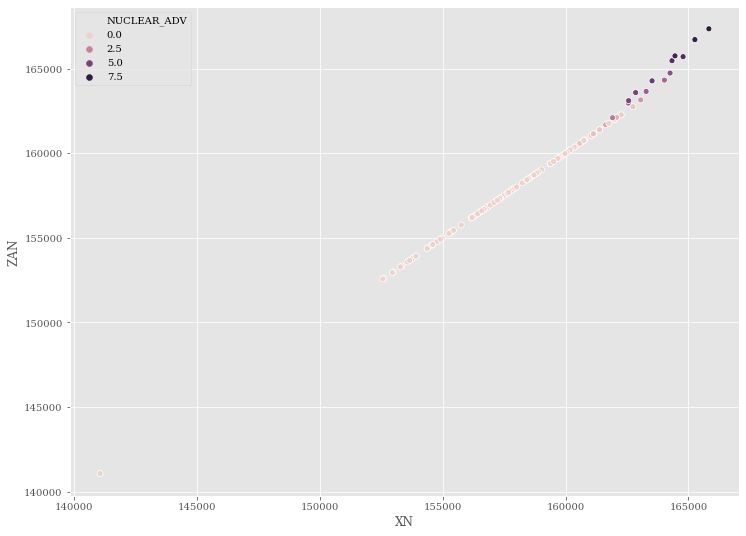

In [13]:
sb.scatterplot(x='XN', y='ZAN', data=df, hue='NUCLEAR_ADV')

<AxesSubplot:xlabel='XN', ylabel='ZAN'>

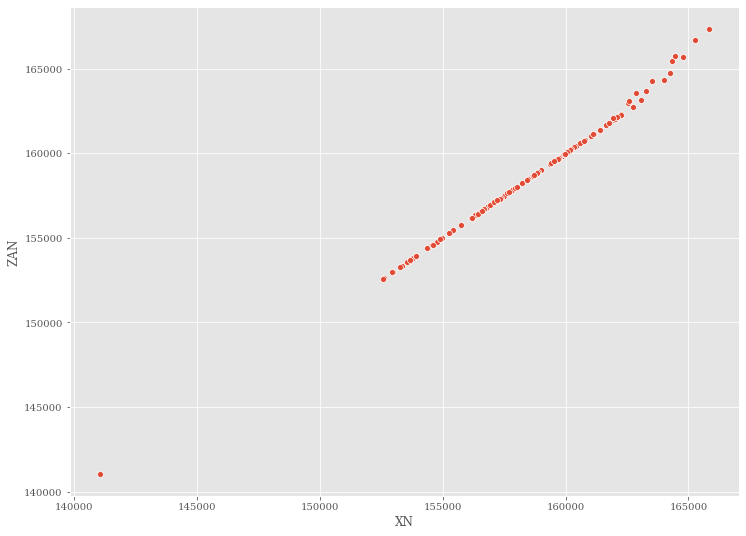

In [20]:
sb.scatterplot(x='XN', y='ZAN', data=df)

<AxesSubplot:ylabel='XN'>

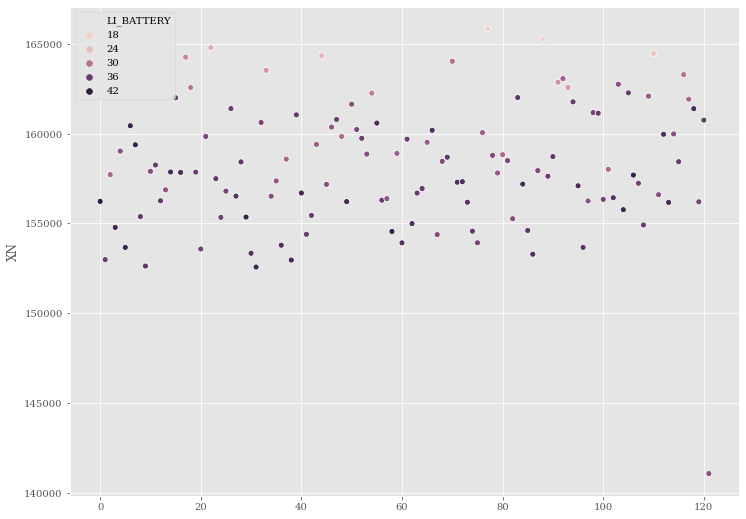

In [19]:
sb.scatterplot(x=df.index, y='XN', data=df, hue='LI_BATTERY')

In [24]:
y = np.array(df['XN'].nsmallest(5))

In [25]:
x = np.array(df['ZAN'].nsmallest(5))

In [26]:
m = (y[-1]-y[0])/(x[-1]-x[0])
m

1.0000000001484801

In [28]:
line = lambda xs: m*xs

Text(0, 0.5, 'Cost of Electricity [$/MWh]\nScenario: Zero Advanced Nuclear')

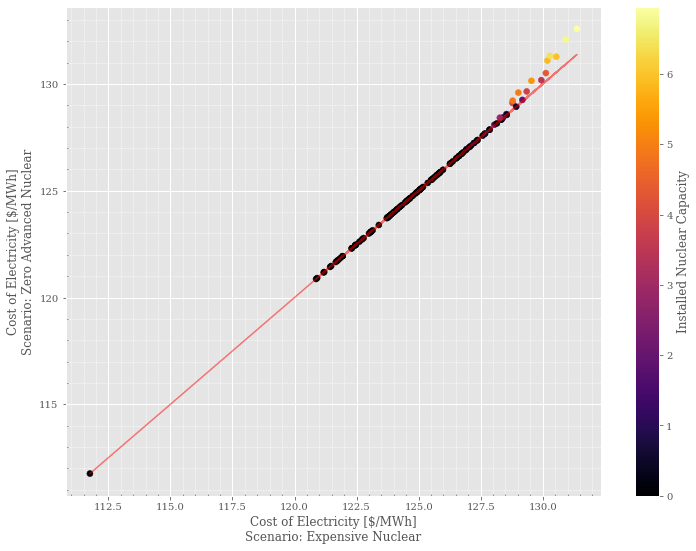

In [74]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1, figsize=(12,9))
# sb.scatterplot(ax=ax, x=df.index, y='ZAN', data=df, hue='NUCLEAR_ADV')
ax.plot(np.array(df['XN']/tot_gwh*1000), line(np.array(df['XN'])/tot_gwh*1000), color='red', alpha=0.5)
ax.minorticks_on()
ax.tick_params(which='minor', direction='in')
ax.grid(which='minor', color='w', linestyle='--', lw=0.5)
ax.grid(which='major', color='w', lw=1)
cm = ax.scatter(df['XN']/tot_gwh*1000, df['ZAN']/tot_gwh*1000, c=df['NUCLEAR_ADV'], cmap='inferno')
# cbar = plt.colorbar(cm.ScalarMappable(cmap='inferno'),ax = ax)
cbar = fig.colorbar(cm)
cbar.set_label('Installed Nuclear Capacity')
ax.set_xlabel('Cost of Electricity [$/MWh]\nScenario: Expensive Nuclear')
ax.set_ylabel('Cost of Electricity [$/MWh]\nScenario: Zero Advanced Nuclear')